<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#предобработка-данных" data-toc-modified-id="предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>предобработка данных</a></span></li><li><span><a href="#Подготовка-данных-к-обучению" data-toc-modified-id="Подготовка-данных-к-обучению-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Подготовка данных к обучению</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>LGBMClassifier</a></span></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

# План выполнения проекта:
1. Загрузим и изучим данные.
2. Проведем предобработку данных.
3. Подготовим выборки для обучения моделей.
4. Обучим разные модели классифицировать комментарии на позитивные и негативные.
5. Посторим модель со значением метрики качества F1 не меньше 0,75.
6. Сделаем выводы.

## Подготовка

Импортируем необходимые библиотеки

In [1]:
import pandas as pd

import torch
import transformers
from tqdm import notebook
from pymystem3 import Mystem
import re

import nltk
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.utils import shuffle

import time 

import lightgbm as lgbm
from lightgbm import LGBMClassifier 
from catboost import CatBoostClassifier

import warnings
#убираем системные предупреждения
warnings.filterwarnings('ignore')

### Обзор данных

Считаем данные из csv-файла в датафрейм и сохраним в переменную

In [2]:
data_comment = pd.read_csv('/datasets/toxic_comments.csv')

In [3]:
display(data_comment.head())

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [4]:
data_comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


**Выводы по шагу 1.1:**
1. данные загружены и изучены.
2. всего 159292 строки, пропуски отсутствуют.
3. подготовим данные к обучению.

### предобработка данных

In [5]:
# удалим столбец Unnamed: 0
data_comment_1 = data_comment.drop(['Unnamed: 0'], axis=1)

In [6]:
data_comment_1

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159287,""":::::And for the second time of asking, when ...",0
159288,You should be ashamed of yourself \n\nThat is ...,0
159289,"Spitzer \n\nUmm, theres no actual article for ...",0
159290,And it looks like it was actually you who put ...,0


In [7]:
# Объявим корпус текстов, переведем его в тип юникод:
#corpus = data_comment_1['text'].values.astype('U')
#print(corpus[0])

In [8]:
# Объявим корпус текстов:
corpus = data_comment_1['text'].values
print(corpus[0])

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


Объявим лемматизатор и функцию для очистки текстов "clear_text"

In [9]:
#def lemmatize(text):
#    m = Mystem()
#    lemm_list = m.lemmatize(text)
#   lemm_text = "".join(lemm_list)
#        
#    return lemm_text

In [10]:
#nltk.download('stopwords')
#stopwords = set(nltk_stopwords.words('english'))

In [11]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [12]:
m = WordNetLemmatizer()

In [13]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
# ввожу функцию очищения текстов комментариев
#def clear_text(text):
#    text = text.lower()
#    text = re.sub(r'[^a-zA-Z]', ' ', text)   
#    text = ' '.join(text.split())
#    return text

In [15]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [16]:
stop_words = set(stopwords.words('english'))

In [17]:
def clear_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text) 
    token = nltk.word_tokenize(text)
    text = [word for word in token if word not in stop_words]
    text = [m.lemmatize(word, get_wordnet_pos(word)) for word in text]
    text = ' '.join(text)
    return text

In [18]:
data_comment_1['lemm_text'] = data_comment_1['text'].apply(clear_text)

In [19]:
data_comment_1.head()

,text,toxic,lemm_text
0,Explanation\nWhy the edits made under my usern...,0,explanation edits make username hardcore metal...
1,D'aww! He matches this background colour I'm s...,0,aww match background colour seemingly stuck th...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man really try edit war guy constantly rem...
3,"""\nMore\nI can't make any real suggestions on ...",0,make real suggestion improvement wonder sectio...
4,"You, sir, are my hero. Any chance you remember...",0,sir hero chance remember page


Иногда одно и то же слово может иметь несколько лемм в зависимости от значения / контекста.

В цикле применим функцию для очистки и лемматизации текстов "clear_text"

In [20]:
#from tqdm import tqdm

#for i in tqdm(range(len(corpus))):
#    corpus[i] = clear_text(corpus[i])

Объединим датасет и корпус

In [21]:
#data_comment_1_corpus = pd.DataFrame(lemmatized_corpus)
#data_comment_1['lemm_text'] = data_comment_1_corpus
#display(data_comment_1.head(10))
#data_comment_1.info()

0    143106
1     16186
Name: toxic, dtype: int64

Баланс классов:  10.2%


<AxesSubplot:title={'center':'Наглядное изображение баланса комментариев'}>

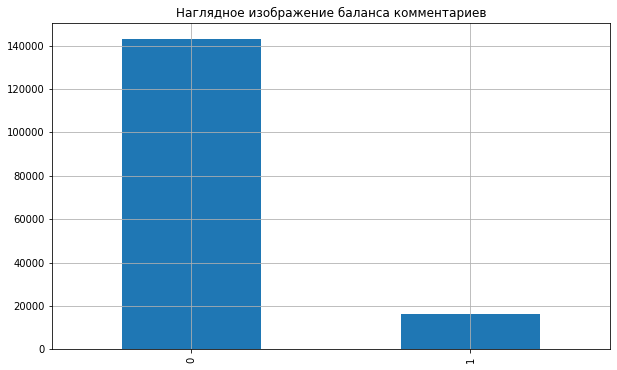

In [22]:
# посмотрим на данные положительных и отрицательных комментариев
display(data_comment_1['toxic'].value_counts())
print(f"Баланс классов: {data_comment_1['toxic'].mean(): .1%}")

# нарисуем гистограмму
data_comment_1['toxic'].value_counts().plot(kind='bar', grid=True, figsize=(10,6), title='Наглядное изображение баланса комментариев')

Классы несбалансированы. В дальнейшем применим балансировку классов class_weight.

### Подготовка данных к обучению

Определяем признаки и целевой признак, разделяем датасет на тренировочную, валидационную и тестовую выборки

In [23]:
features = data_comment_1['lemm_text']
target = data_comment_1['toxic']

In [24]:
features_train_1, features_valid_1, target_train, target_valid = train_test_split(
    features, target, test_size=0.2, random_state=12345)
features_valid_1, features_test_1, target_valid, target_test = train_test_split(
    features_valid_1, target_valid, test_size=0.5, random_state=12345)

Сделаем стоп-слова и векторизацию текста

In [25]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
count_tf_idf = TfidfVectorizer(stop_words=stopwords) 

#Выполняю векторизацию текстов
features_train = count_tf_idf.fit_transform(features_train_1)
features_valid = count_tf_idf.transform(features_valid_1)
features_test = count_tf_idf.transform(features_test_1)

In [27]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)
print(target_train.shape)
print(target_valid.shape)
print(target_test.shape)

(127433, 132168)
(15929, 132168)
(15930, 132168)
(127433,)
(15929,)
(15930,)


**Вывод**:
1. на первом шаге загрузили данные. Для анализа представлен набор данных с разметкой о токсичности комментариев, содержащий 159292 строк, состоит из следующих столбцов:
 - text — текст комментария;
 - toxic — является ли комментарий токсичным (1) или нет (0)
2. Пропуски в данных отсутствуют.
3. после ознакомления с данными и их предобработки объявлен корпус текстов и переведен в тип юникод. Затем тексты были очищены и лемматизированы. Проверка соотношения классов показала, что данные несбалансированы. Токсичных комментариев всего 10,2% от всего датасета. Этот аспект учтем в дальнейшем при обучении моделей. Для векторизации текстов был использован TfidfVectorizer(). 
4. Данные разделены на обучающую, валидационную и тестовую выборки в соотношении 80/10/10. Можно приступать к обучению моделей.

## Обучение

### LogisticRegression

In [28]:
best_iter = 0
best_result_log = 0
dict_classes={0:1, 1:11}
for iter in range(1, 45):
    model = LogisticRegression(random_state=12345, max_iter=iter, class_weight=dict_classes) # объявляем модель с заданным количеством итераций
    model.fit(features_train, target_train) # обучение модель на тренировочной выборке
    predictions_valid = model.predict(features_valid) # получение предсказания модели
    result = f1_score(target_valid, predictions_valid) # посчитаем качество модели на валидационной выборке
    print('Количество итераций', iter, 'F1', result)
    if result > best_result_log:
        best_iter = iter # сохраняем наилучшую модель
        best_result_log = result #  сохраняем наилучшее значение метрики accuracy на валидационных данных

print("Лучшее количество итераций:", best_iter, 'Лучший F1', best_result_log)

Количество итераций 1 F1 0.1832801094890511
Количество итераций 2 F1 0.2029315137730604
Количество итераций 3 F1 0.5580645161290323
Количество итераций 4 F1 0.5782626940830886
Количество итераций 5 F1 0.6433239962651728
Количество итераций 6 F1 0.6381753764393269
Количество итераций 7 F1 0.6559529198732458
Количество итераций 8 F1 0.673654786862334
Количество итераций 9 F1 0.6799905948742064
Количество итераций 10 F1 0.6947317777243205
Количество итераций 11 F1 0.7085912354543205
Количество итераций 12 F1 0.7058534185932119
Количество итераций 13 F1 0.7117969138875063
Количество итераций 14 F1 0.7220818595250126
Количество итераций 15 F1 0.7258805513016844
Количество итераций 16 F1 0.7324742268041239
Количество итераций 17 F1 0.735370274469187
Количество итераций 18 F1 0.734641197728446
Количество итераций 19 F1 0.7343345416882444
Количество итераций 20 F1 0.7346832814122534
Количество итераций 21 F1 0.7369246861924686
Количество итераций 22 F1 0.7360711483128434
Количество итераций 23

на сбалансированных классах метрика F1 удовлетворяет условиям заказчика и составляет 0,75101

### RandomForestClassifier

In [29]:
# подберем циклом лучший параметр max_depth.
#for max_depth in range(1, 55):
 #   model_forest = RandomForestClassifier(
  #      max_depth=max_depth, random_state=12345, n_estimators=55, class_weight=dict_classes) # объявляем модель 
  #  model_forest.fit(features_train, target_train) # обучение модель на тренировочной выборке
  #  predictions_valid = model_forest.predict(features_valid) # получение предсказания модели
  #  print('max_depth', max_depth, 'F1', f1_score(target_valid, predictions_valid))

In [30]:
# подбираем циклом гиперпараметр n_estimators (количество деревьев).
#for est in range(1, 55, 1):
 #   model_forest = RandomForestClassifier(
 #       max_depth=55, random_state=12345, n_estimators=est, class_weight=dict_classes) # объявляем модель с заданным количеством деревьев
 #   model_forest.fit(features_train, target_train) # обучение модель на тренировочной выборке
  #  predictions_valid = model_forest.predict(features_valid) # получение предсказания модели
  #  print('Количество деревьев', est, 'F1', f1_score(target_valid, predictions_valid))

In [31]:
best_est = 0
best_result_forest = 0
for est in range(1, 35):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight=dict_classes) # объявляем модель с заданным количеством деревьев
    model.fit(features_train, target_train) # обучение модель на тренировочной выборке
    predictions_valid = model.predict(features_valid) # получение предсказания модели
    result = f1_score(target_valid, predictions_valid) # посчитаем качество модели на валидационной выборке
    print('Количество деревьев', est, 'F1', result)
    if result > best_result_forest:
        best_est = est # сохраняем наилучшую модель
        best_result_forest = result #  сохраняем наилучшее значение метрики accuracy на валидационных данных

print('Лучшее количество деревьев', best_est, 'Лучший F1', best_result_forest)

Количество деревьев 1 F1 0.5184304399524375
Количество деревьев 2 F1 0.4830188679245283
Количество деревьев 3 F1 0.5954253037884203
Количество деревьев 4 F1 0.5258371227780074
Количество деревьев 5 F1 0.5990192380233874
Количество деревьев 6 F1 0.5622457282343368
Количество деревьев 7 F1 0.6070188970304666
Количество деревьев 8 F1 0.5805409769882922
Количество деревьев 9 F1 0.615082482325216
Количество деревьев 10 F1 0.5893365893365893
Количество деревьев 11 F1 0.6127121989735491
Количество деревьев 12 F1 0.5848670756646217
Количество деревьев 13 F1 0.6085918854415274
Количество деревьев 14 F1 0.5860655737704917
Количество деревьев 15 F1 0.608
Количество деревьев 16 F1 0.583743842364532
Количество деревьев 17 F1 0.611689351481185
Количество деревьев 18 F1 0.5973813420621932
Количество деревьев 19 F1 0.6147047006830052
Количество деревьев 20 F1 0.6
Количество деревьев 21 F1 0.6129681836488119
Количество деревьев 22 F1 0.5975409836065574
Количество деревьев 23 F1 0.6156941649899396
Колич

### DecisionTreeClassifier

In [32]:
for depth in range(1, 50):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight=dict_classes) # объявляем модель с заданной глубиной дерева
    model.fit(features_train, target_train) # обучение модели
    predictions_valid = model.predict(features_valid) # получение предсказания модели
    print('Глубина дерева', depth, 'F1', f1_score(target_valid, predictions_valid))

Глубина дерева 1 F1 0.39029222387320456
Глубина дерева 2 F1 0.2164340192833501
Глубина дерева 3 F1 0.2177007692860738
Глубина дерева 4 F1 0.2182340272792534
Глубина дерева 5 F1 0.5282363162467419
Глубина дерева 6 F1 0.2435096943805455
Глубина дерева 7 F1 0.2442309271577564
Глубина дерева 8 F1 0.25506844567665915
Глубина дерева 9 F1 0.25549212938937904
Глубина дерева 10 F1 0.25425477050025785
Глубина дерева 11 F1 0.5825849277625929
Глубина дерева 12 F1 0.2664488610581722
Глубина дерева 13 F1 0.2813264208158075
Глубина дерева 14 F1 0.282219395244153
Глубина дерева 15 F1 0.2808179162609542
Глубина дерева 16 F1 0.2820612922115948
Глубина дерева 17 F1 0.5965407695022943
Глубина дерева 18 F1 0.2969596001665973
Глубина дерева 19 F1 0.29684562356381866
Глубина дерева 20 F1 0.6067572274468827
Глубина дерева 21 F1 0.30230810520665596
Глубина дерева 22 F1 0.6075862068965516
Глубина дерева 23 F1 0.6155988857938719
Глубина дерева 24 F1 0.6086662153012864
Глубина дерева 25 F1 0.6171505739365294
Глуб

### CatBoostClassifier

In [33]:
#cat_boost_cl = CatBoostClassifier(verbose=False, iterations=250)
#cat_boost_cl.fit(features_train, target_train)
#predictions_valid = cat_boost_cl.predict(features_valid)
#print('F1', f1_score(target_valid, predictions_valid))

### LGBMClassifier

In [34]:
#model_lgbm = LGBMClassifier(random_state=12345, class_weight=dict_classes)
#model_lgbm.fit(features_train, target_train)
#predictions_valid = model_lgbm.predict(features_valid)
#print('F1', f1_score(target_valid, predictions_valid))

### Тестирование лучшей модели

In [35]:
# тестирование лучшей модели
model_log_test = LogisticRegression(class_weight='balanced') # объявляем модель с заданным количеством итераций
model_log_test.fit(features_train, target_train) # обучение модель на тренировочной выборке
predictions_test = model_log_test.predict(features_test) # получение предсказания модели
print('F1', round(f1_score(target_test, predictions_test), 2))

F1 0.75


## Выводы

1. Загрузила данные и провела их предобработку - после ознакомления с данными и их предобработки объявлен корпус текстов и переведен в тип юникод. Затем тексты были очищены и лемматизированы. Проверка соотношения классов показала, что данные несбалансированы. Токсичных комментариев всего 10,2% от всего датасета. Этот аспект учли в дальнейшем при обучении моделей (использован class_weight). Для векторизации текстов был использован TfidfVectorizer().
2. обучила 3 модели с разными гиперпараметрами (LogisticRegression, DecisionTreeClassifier, RandomForestClassifier) и проверила их на валидационной выборке.
3. Лучший показатель F1 оказался у модели LogisticRegression - 0,75101 на валидационной выборке.
4. На тестировании лучшая модель показала F1 = 0.75495. Поскольку требовалось найти модель классификации комментариев на позитивные и негативные со значением метрики качества F1 >= 0.75, рекомендовать могу LogisticRegression.